In [1]:

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB

from xgboost import XGBClassifier

from transformers import pipeline

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [2]:
df = pd.read_csv('/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv')
df.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [4]:
from datetime import datetime
df['reviews.date'] =pd.to_datetime(df['reviews.date'])
data = df[["reviews.text","reviews.rating","name","reviews.date"]]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   reviews.text    34659 non-null  object             
 1   reviews.rating  34627 non-null  float64            
 2   name            27900 non-null  object             
 3   reviews.date    34621 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 1.1+ MB


In [6]:
data.dropna(inplace=True)
data.isnull().sum()

reviews.text      0
reviews.rating    0
name              0
reviews.date      0
dtype: int64

In [7]:

import random

n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(data.shape[0]))
    print(f"REVIEW TEXT:\n{data['reviews.text'][i]} \n\nRATE:\n{data['reviews.rating'][i]}\n\nNAME:\n{data['name'][i]}\n\ndate:\n{data['reviews.date'][i]}")
    print('\n', 90*"-", '\n')
    

REVIEW TEXT:
This tablet is easy to set up, has great resolution, and is perfect for reading books or surfing. The price is affordable, too. It is perfect for anyone who wants a fun and casual way to use technology. 

RATE:
4.0

NAME:
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta

date:
2017-03-18 00:00:00+00:00

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Had the original Kindle and filled it. Upgraded to the Kindle Voyage and absolutely love it! 

RATE:
5.0

NAME:
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,

date:
2015-01-16 00:00:00+00:00

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I absolutely love my Kindle fire! I'm able to do everything on it; read, watch videos, play games, listen to music, shop, etc. 

RATE:
5.0

NAME:
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, 

In [8]:
data.describe()
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    18681
4.0     7214
3.0     1289
2.0      339
1.0      326
Name: reviews.rating, dtype: int64

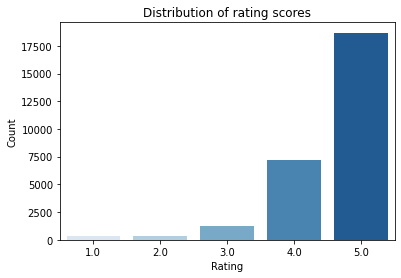

In [9]:
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [10]:

data2 = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2 = data2[['reviews.text', 'reviews.rating','name',"dateAdded"]]
data2.rename(columns = {'dateAdded':'reviews.date'}, inplace = True)

data2 = data2[data2["reviews.rating"] <= 3].reset_index(drop=True) 
data3 = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data3 = data3[['reviews.text', 'reviews.rating','name','dateAdded']]
data3.rename(columns = {'dateAdded':'reviews.date'}, inplace = True)

data3 = data3[data3["reviews.rating"] <= 3].reset_index(drop=True) 

In [11]:
data2['reviews.rating'].value_counts().sort_index(ascending=False)

3    1206
2     616
1     965
Name: reviews.rating, dtype: int64

In [12]:
data3['reviews.rating'].value_counts().sort_index(ascending=False)

3    197
2     54
1     63
Name: reviews.rating, dtype: int64

In [13]:
data = pd.concat([data, data2, data3])


data.tail()

,reviews.text,reviews.rating,name,reviews.date
309,The battery is having more and more trouble ho...,2.0,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",2017-03-06T14:59:25Z
310,My daughter has had this tablet for almost 2 m...,3.0,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",2017-03-06T14:59:25Z
311,Very cheap and was not impressed at all never ...,1.0,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",2017-03-06T14:59:25Z
312,"Hard to use, Lots of ads, and Randomly closes ...",2.0,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",2017-03-06T14:59:25Z
313,I wish it has some more of the apps from the p...,3.0,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",2017-03-06T14:59:25Z


In [14]:
import random

n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(data.shape[0]))
    print(f"REVIEW TEXT:\n{data['reviews.text'][i]} \n\nRATE:\n{data['reviews.rating'][i]}\n\nNAME:\n{data['name'][i]}\n\ndate:\n{data['reviews.date'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT:
1713    I was a ook user and have been converted to ki...
1713    I recommend this speaker Easy to work great sound
Name: reviews.text, dtype: object 

RATE:
1713    5.0
1713    3.0
Name: reviews.rating, dtype: float64

NAME:
1713    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
1713    Amazon Tap Smart Assistant Alexaenabled (black...
Name: name, dtype: object

date:
1713    2016-12-15 00:00:00+00:00
1713         2017-01-04T03:51:17Z
Name: reviews.date, dtype: object

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Just love my new tablet. I have had a kindle fire for 4 years and it was messing up badly so I needed a new one badly. 

RATE:
5.0

NAME:
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta

date:
2015-12-29 00:00:00+00:00

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I bought 4 already and So far my cousins love it. St

In [15]:
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    18681
4.0     7214
3.0     2692
2.0     1009
1.0     1354
Name: reviews.rating, dtype: int64

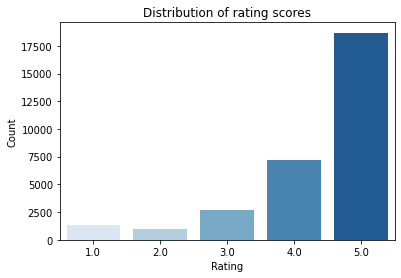

In [16]:
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [17]:
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}



data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,reviews.text,reviews.rating,name,reviews.date,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",2017-01-13 00:00:00+00:00,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",2017-01-13 00:00:00+00:00,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",2017-01-13 00:00:00+00:00,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",2017-01-13 00:00:00+00:00,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",2017-01-12 00:00:00+00:00,1,POSITIVE


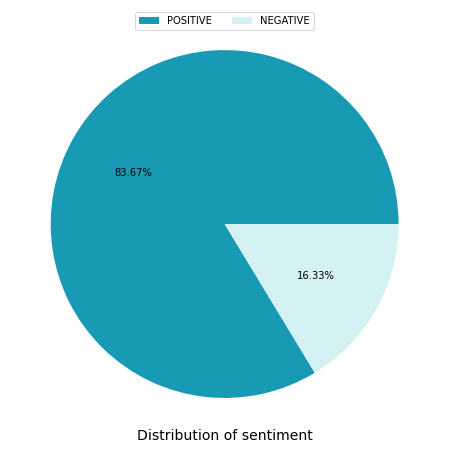

In [18]:
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [19]:
group=data.groupby('name')
kindle=group.get_group('Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)')
firetablet=group.get_group('Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta')
kindlepaper=group.get_group('Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,')

#import matplotlib.pyplot as plt
#import numpy as np

#xpoints = kindle['reviews.date']
#ypoints = kindle['sentiment_score']

import plotly.express as px
fig = px.scatter(x=kindle['reviews.date'], y=kindle['sentiment'],labels={'x':'date', 'y':'sentiment'},title='Kindle')
fig.show()
fig1 = px.scatter(x=firetablet['reviews.date'], y=firetablet['sentiment'],labels={'x':'date', 'y':'sentiment'},title='Firetablet')
fig1.show()
fig1 = px.scatter(x=kindlepaper['reviews.date'], y=kindlepaper['sentiment'],labels={'x':'date', 'y':'sentiment'},title='Kindle Paperwhite')
fig1.show()
#plt.plot(xpoints, ypoints,'o')
#plt.show()

In [20]:
all_words = pd.Series(' '.join(data['reviews.text']).split())

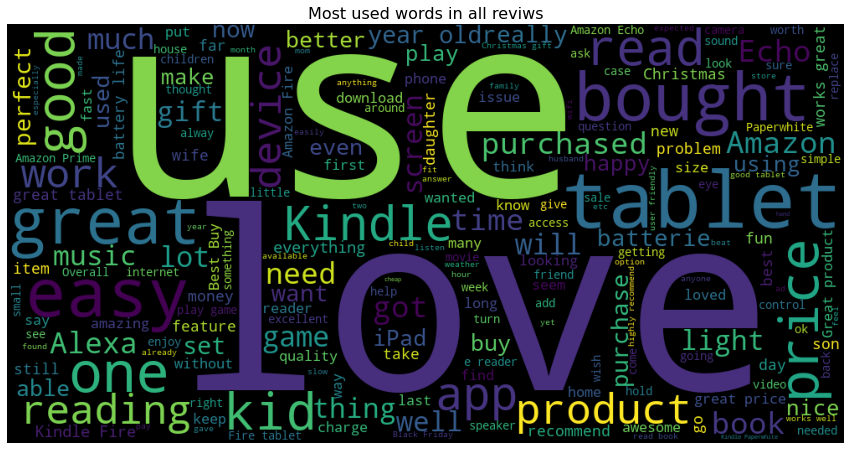

In [21]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

In [22]:
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews.text']).split())

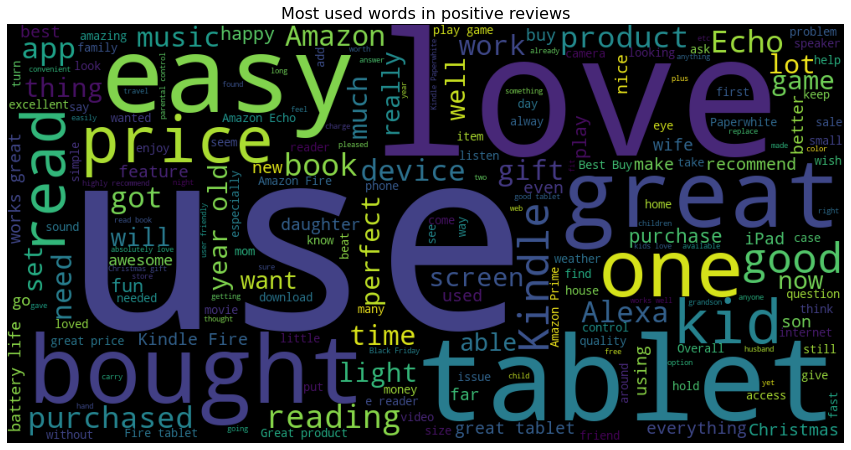

In [23]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

In [24]:
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews.text']).split())

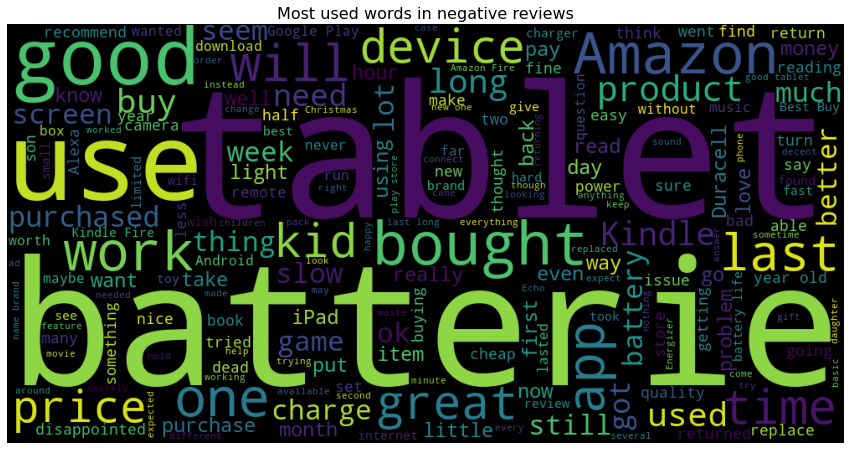

In [25]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

In [26]:
def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text

In [27]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
clean_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'this is a message to be cleaned it may involve some things like adjacent spaces and tabs'

In [28]:
def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    filtered_sentence = []

    
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text

In [29]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
remove_stopwords(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be cleaned may involve some things like adjacent spaces tabs'

In [30]:
def stemm_text(text:str):
    """ Stemm text:
    ------
    input: text (str)    
    output: Stemmed text (str)
    """
    text = str(text)
   
    snow = SnowballStemmer('english')

    stemmed_sentence = []
   
    words = word_tokenize(text)
    for w in words:
       
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)
    
    return text

In [31]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
stemm_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'messag be clean may involv some thing like adjac space tab'

In [32]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [33]:
def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)    
    output: lemmatized text (str)
    """
    text = str(text)
    
    
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    
    words = word_tokenize(text)
    
    word_pos_tags = nltk.pos_tag(words)
    
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text

In [34]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)

lemmatize(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be clean may involve some thing like adjacent space tabs'

In [35]:
data['text'] = data['reviews.text'].apply(clean_text)

data['text'] = data['text'].apply(remove_stopwords)

data['text'] = data['text'].apply(lemmatize)

In [36]:
import random

i = random.choice(range(len(data)))

print(f"Original review: \n{data['reviews.text'].iloc[i]}\n")
print(f"Processed review: \n{data['text'].iloc[i]}")      

Original review: 
Tablet is great for kids and adult use. I purchased the tablet to use at school with students with disabilities. The tablet holds up well holds a charge throughout the week. The tablet offers games that do not require Wi-Fi or data. If you have a prime membership there are a lot of benefits when using the fire, for example free apps, free streaming movies & music, etc.

Processed review: 
tablet great for kid adult use i purchase tablet use at school with student with disability tablet hold up well hold charge throughout week tablet offer game do not require wi fi or data if you have prime membership there be lot of benefit when use fire for example free apps free stream movie music etc


In [37]:
data.to_csv('cleaned_data.csv', index=False)

In [38]:
data = pd.read_csv('cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30950 entries, 0 to 30949
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     30950 non-null  object 
 1   reviews.rating   30950 non-null  float64
 2   name             30950 non-null  object 
 3   reviews.date     30950 non-null  object 
 4   sentiment_score  30950 non-null  int64  
 5   sentiment        30950 non-null  object 
 6   text             30949 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [39]:
data[data['text'].isnull()]

,reviews.text,reviews.rating,name,reviews.date,sentiment_score,sentiment,text
9680,.................................................,5.0,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",2016-09-09 00:00:00+00:00,1,POSITIVE,NaN


In [40]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30949 entries, 0 to 30949
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     30949 non-null  object 
 1   reviews.rating   30949 non-null  float64
 2   name             30949 non-null  object 
 3   reviews.date     30949 non-null  object 
 4   sentiment_score  30949 non-null  int64  
 5   sentiment        30949 non-null  object 
 6   text             30949 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.9+ MB


In [41]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['text'])
features = vectorizer.transform(data['text'])

features.toarray()

array([[0.        , 0.32174191, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
# tf_idf.drop('50', axis=1, inplace=True)
tf_idf.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,would,wouldn,wrong,year,yet,you,young,your,youtube,yr
0,0.0,0.321742,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.115157,0.0,0.0,0.131958,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.077496,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.121560,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.071390,0.0,0.0,0.0,0.0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.2, random_state=42)

print (f'Train set shape\t:{X_train.shape}\nTest set shape\t:{X_test.shape}')

Train set shape	:(24759, 700)
Test set shape	:(6190, 700)


In [44]:
yy = pd.DataFrame(y_train)
train_data = pd.concat([X_train, yy],axis=1)
train_data.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
0,0.0,0.321742,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000000,0.115157,0.0,0.0,0.131958,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.077496,0.0,0.0,0.0,0.0,1.0
4,0.0,0.000000,0.000000,0.0,0.0,0.121560,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.071390,0.0,0.0,0.0,0.0,1.0


In [45]:
train_data['sentiment_score'].value_counts()

1.0    20756
0.0     4003
Name: sentiment_score, dtype: int64

In [46]:
target_count = train_data['sentiment_score'].value_counts()
negative_class = train_data[train_data['sentiment_score'] == 0]
positive_class = train_data[train_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
28877,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
28117,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
982,0.0,0.0,0.141638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
df_train_over.dropna(inplace=True)

In [48]:
df_train_over['sentiment_score'].value_counts()

1.0    18026
0.0    17239
Name: sentiment_score, dtype: int64

In [49]:
X_train = df_train_over.iloc[:,:-1]
y_train = df_train_over['sentiment_score']

In [50]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
   
  
    model = Model
    
   
    model.fit(Xtrain, y_train)
    global y_pred

    y_pred = model.predict(Xtest)
    
 
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
   
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))

 
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

              precision    recall  f1-score   support

           0       0.52      0.75      0.62      1052
           1       0.94      0.86      0.90      5138

    accuracy                           0.84      6190
   macro avg       0.73      0.80      0.76      6190
weighted avg       0.87      0.84      0.85      6190

AUC  0.8045445698715453


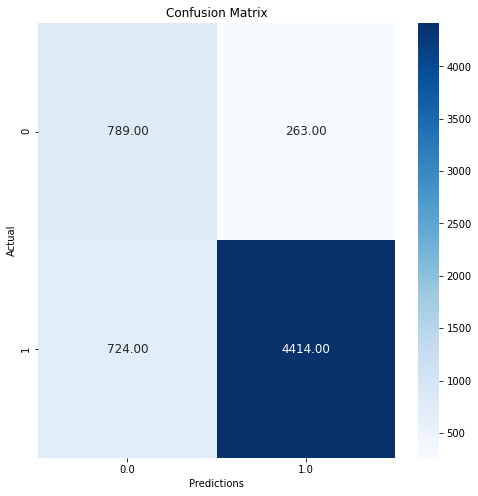

In [51]:
modeling(MultinomialNB())

[08:14:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1052
           1       0.94      0.92      0.93      5138

    accuracy                           0.89      6190
   macro avg       0.80      0.83      0.81      6190
weighted avg       0.89      0.89      0.89      6190

AUC  0.8273654733906906


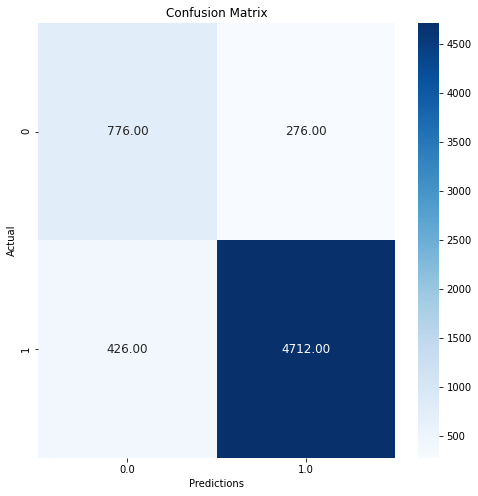

In [52]:
modeling(XGBClassifier());